In [1]:
import sys
import os
import math
import logging
import time
import galsim
import galsim.des
import galsim.convolve
import pdb
from glob import glob
import pickle
import scipy
import yaml
import numpy as np
import fitsio
from astropy.io import fits
from numpy.random import SeedSequence, default_rng
from functools import reduce
from astropy.table import Table
from argparse import ArgumentParser
from multiprocessing import Pool
import matplotlib.pyplot as plt

from matplotlib import ticker, rc
plt.style.use('default')
rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [1]:
def get_zernike(zernike_band, strehl_ratio, csv_dir):
    sr = str(int(strehl_ratio))
    fname = os.path.join(csv_dir, f'psf/{zernike_band}_{sr}.csv')
    return np.genfromtxt(fname, delimiter=',')[:, 1][1:]

zernike_band = 'b'
strehl_ratio = 100
csv_dir = '/home/wslgeorgios/superbit-metacal' #For local drive
csv_dir = '/work/mccleary_group/vassilakis.g/opticalpsf' #For discovery drive

In [3]:
aberrations = get_zernike(zernike_band, strehl_ratio, csv_dir)

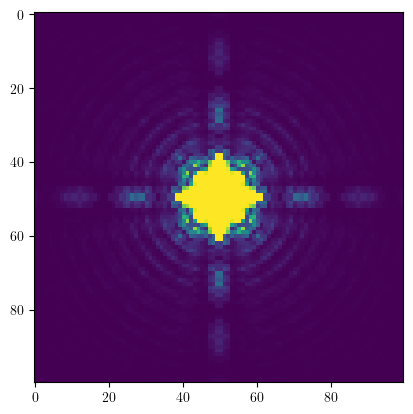

In [4]:
lam = 476.22025867791064
tel_diam = 0.5
nstruts = 4
strut_thick = 0.087
strut_theta = 90* galsim.degrees
obscuration = 0.38
jitter_fwhm = 0.11
pix_scale = 0.141 # for drawing\n",
#pix_scale = 0.05 # for drawing\n

jitter_psf = galsim.Gaussian(fwhm=jitter_fwhm)
optics = galsim.OpticalPSF(lam=lam,diam=tel_diam, obscuration=obscuration, nstruts=nstruts, strut_angle=strut_theta,
                           strut_thick=strut_thick,aberrations=aberrations)
psf = galsim.Convolve([jitter_psf, optics])
psf_stamp = psf.drawImage(nx=100, ny=100, scale=0.141)

plt.imshow(psf_stamp.array, vmin=0, vmax=0.00025)
plt.savefig('psf.pdf', format='pdf')
plt.show()